Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 no

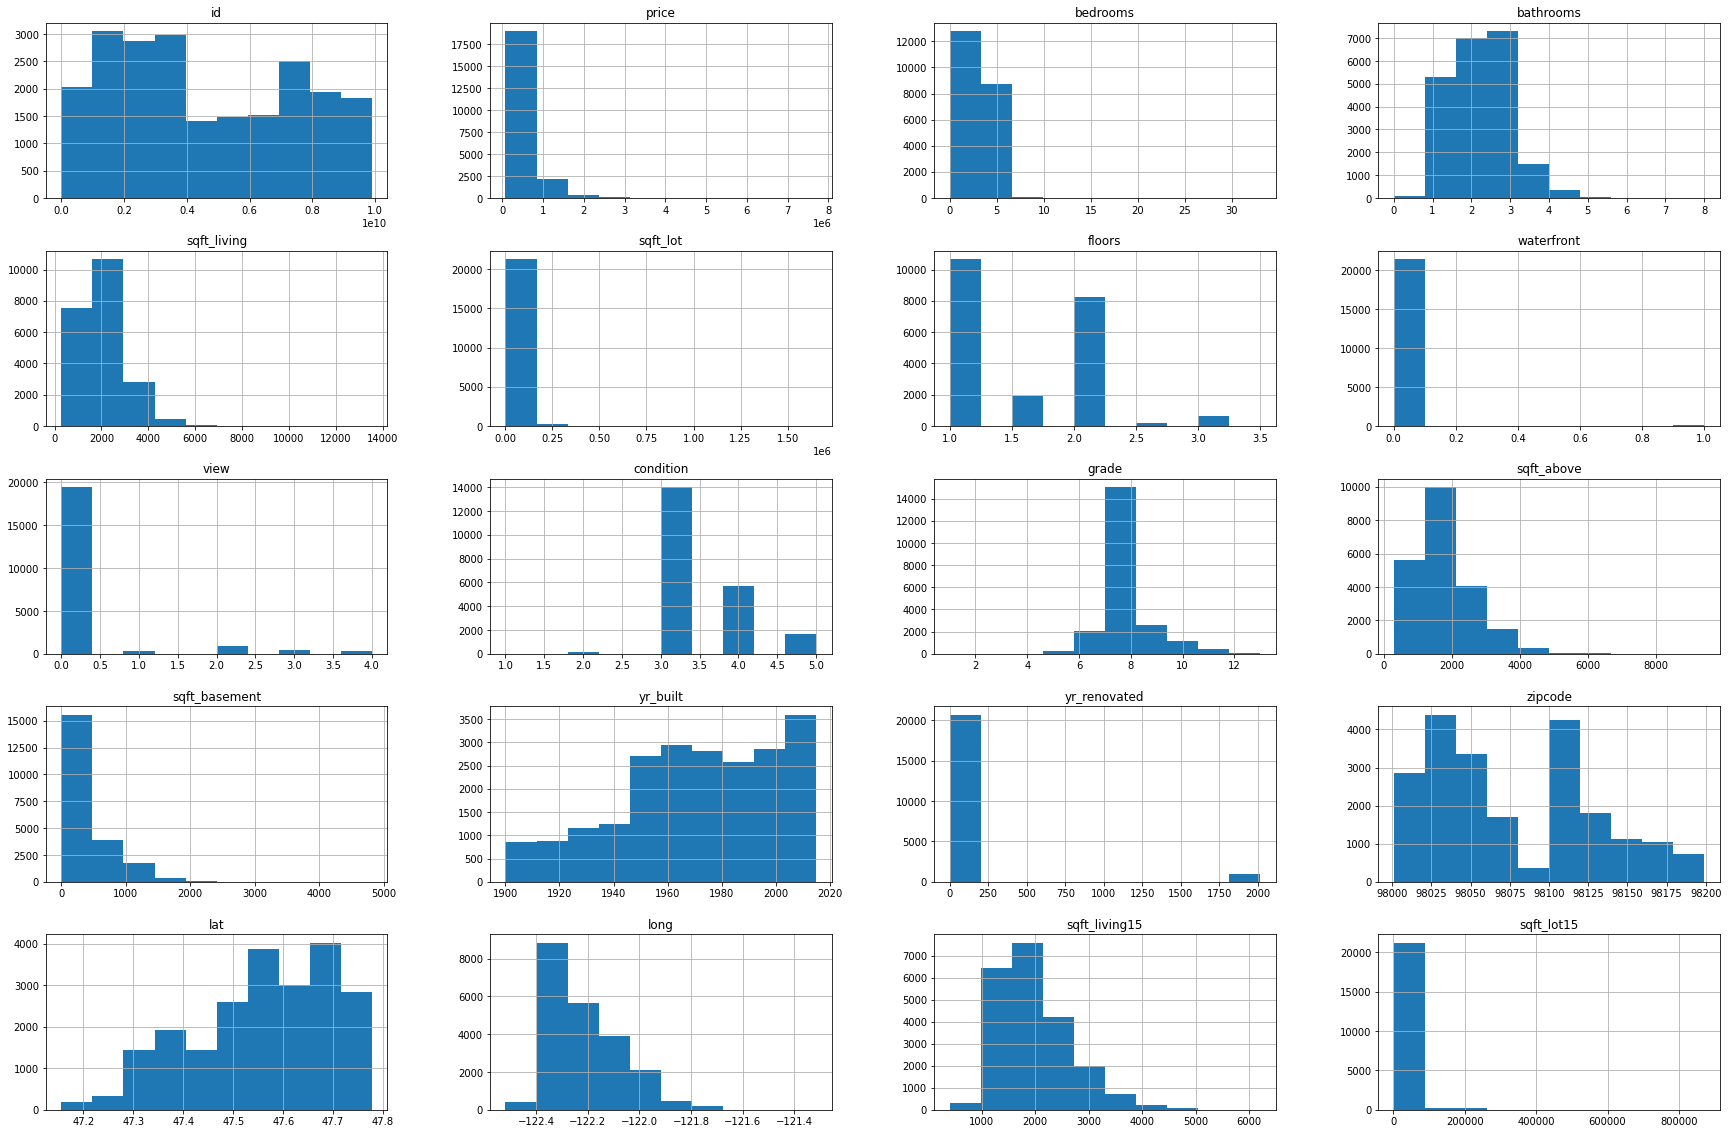

<ipython-input-1-ec9b29232075>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price']=scaler.fit_transform(df[['price']].values)
<ipython-input-1-ec9b29232075>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bedrooms']=scaler.fit_transform(df1[['bedrooms']].values)
<ipython-input-1-ec9b29232075>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

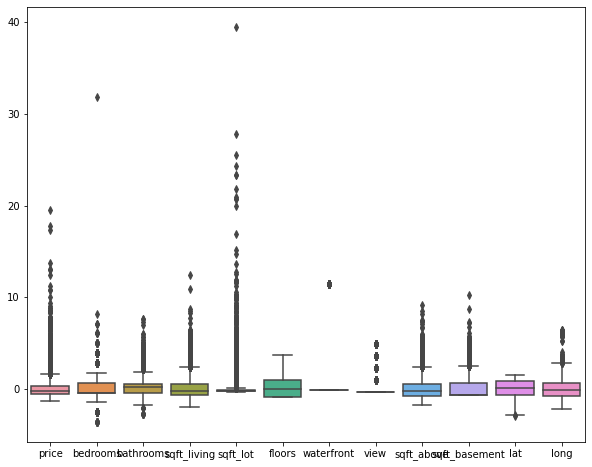

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/gdrive')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

#1#Explore this dataset using what you have learned in data preprocessing and data visualization

df=pd.read_csv("/content/gdrive/MyDrive/Gomycode/kc_house_data.csv",sep=",")
#print(df.head())
df.info()
print(df.isnull().sum().sum())
print(df.isnull().sum())    #  --->no missing values
df.hist(figsize=(30,20))
plt.show()
df1=df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','sqft_above','sqft_basement','lat','long']]
scaler= StandardScaler()
df1['price']=scaler.fit_transform(df[['price']].values)
df1['bedrooms']=scaler.fit_transform(df1[['bedrooms']].values)
df1['bathrooms']=scaler.fit_transform(df1[['bathrooms']].values)
df1['sqft_living']=scaler.fit_transform(df1[['sqft_living']].values)
df1['sqft_lot']=scaler.fit_transform(df1[['sqft_lot']].values)
df1['floors']=scaler.fit_transform(df1[['floors']].values)
df1['waterfront']=scaler.fit_transform(df1[['waterfront']].values)
df1['view']=scaler.fit_transform(df1[['view']].values)
df1['sqft_above']=scaler.fit_transform(df1[['sqft_above']].values)
df1['sqft_basement']=scaler.fit_transform(df1[['sqft_basement']].values)
df1['lat']=scaler.fit_transform(df1[['lat']].values)
df1['long']=scaler.fit_transform(df1[['long']].values)
plt.figure(figsize=(10,8))
sns.boxplot(data=df1)
#df1.plot.box(figsize=(15,7))
#plt.show()

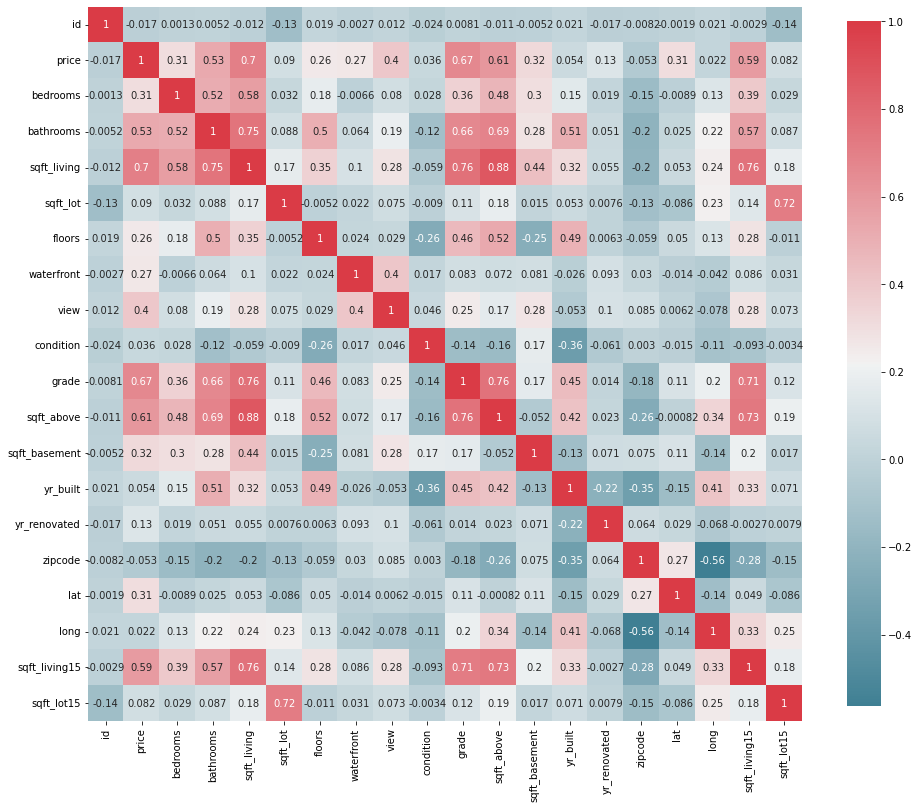

In [ ]:
#Features selection
#Heatmap
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 16 , 14 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr,

        cmap = cmap,

        square=True,

        cbar_kws={ 'shrink' : .9 },

        ax=ax,

        annot = True,

        annot_kws = { 'fontsize' : 10 }

        )
plot_correlation_map(df)

#We set a treshhold=0.3
#We can see in the heatmap that our target feature "price" is highly correlated with "bedrooms,bathrooms,sqft_living,
#view,grade,sqft_above,sqft_basement,lat,sqft_living15"

[[279.95945438]]
[-41917.39698844]


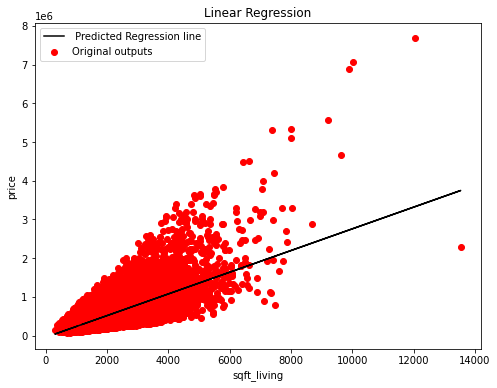

MSE: 67842222652.74759
R squared error: 0.5008750980131821


In [ ]:
#Spliting the dataset into a training set and a testing set
y=df['price']
x=df[['bedrooms','bathrooms','sqft_living','view','grade','sqft_above','sqft_basement','lat']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=30)

#Applying linear regression
model=LinearRegression()


X_train=np.array(x_train['sqft_living']).reshape(-1,1)
X_test=np.array(x_test['sqft_living']).reshape(-1,1)
Y_test=np.array(y_test).reshape(-1,1)
Y_train=np.array(y_train).reshape(-1,1)
model.fit(X_train,Y_train)
predicted=model.predict(X_test)

#Cheking our model coefficient
print(model.coef_)
print(model.intercept_)

#Plot linear regression
input=np.array(x['sqft_living']).reshape(-1,1)
_, ax = plt.subplots(figsize= (8, 6))
plt.scatter(x['sqft_living'],y,color="r",label="Original outputs")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(input,model.predict(input),color="k",label=' Predicted Regression line')
plt.legend()
plt.show()

#testing our model’s performance
print("MSE:", mean_squared_error(Y_test,predicted))
print("R squared error:", metrics.r2_score(Y_test,predicted))
#R squared error=0.5 so we can say that half of the output variable[price] can be explained and predicted by the single feature(input) [sqft_living]

In [ ]:
#Multiple-Linear Regression

#We already did the splitting of our data

model=LinearRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

#testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

#We see that the loss function with multiple regression=0.65 is closer to 1 compared to the single linear regression=0.50
# because we used multiple feautures to predict our target

MSE 47413345183.69
R squared 0.6511732613949375


In [ ]:
#Polynomial regression
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.fit_transform(x_test)

lg=LinearRegression()
lg.fit(x_train_poly,y_train)
predicted=lg.predict(x_test_poly)

print('Mean Squared Error (MSE) ', metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

#We conclude that the polynomial regression gives us a better prediction of our tagret"price"
#since it's has the higher R-squared score 0.72 compared to linear 0.50 and multiple linear regression 0.65

Mean Squared Error (MSE)  36715347230.57334
R squared:  0.7298799571813597
